In [1]:
### uncomment to display figures
# %matplotlib inline

# Demonstrates benchmarking functionality - OzFlux ET sites

In [2]:
from awrams.benchmarking.benchmark import Benchmark
from awrams.benchmarking.utils import read_id_csv
from awrams.utils import datetools as dt

## Set up comparison
comparing at OzFlux ET sites

In [3]:
data_path = '../../test_data/benchmarking/ozflux/'
obs_csv = data_path+'/ozflux_monthly.csv'
et = Benchmark("OzFlux", "evapotranspiration")
et.site_set_name = ['ET flux tower benchmarking','OzFlux']
et.id_type = 'site'
et.site_id_type = 'pred_index'
et.site_ref_type = 'ID'
et.load(obs_csv)

In [4]:
et.sites

['Hume Dam',
 'Howard Springs',
 'Kyeamba',
 'Tumbarumba',
 'Virginia Park',
 'Wallaby Creek']

## Add models to the comparison
read data from pre-processed csv

In [5]:
csv_data = data_path+'/awral_etot_avg.csv'
et.add_model("AWRAMSI_v4_0_AWRAL", data_csv=csv_data)

### Show list of loaded or selected models
list of loaded models is available with <tab> activated dropdown by typing "et.models."<br>
can "select" or "unselect" models for displaying

In [6]:
et.benchmark.selection

['AWRAMSI_v4_0_AWRAL']

In [7]:
et.benchmark.selection.AWRAMSI_v4_0_AWRAL.unselect()
et.benchmark.selection.AWRAMSI_v4_0_AWRAL.select()

## Plot timeseries

2016-10-13 02:56:21,651 WARNING no data to plot for AWRAMSI_v4_0_AWRAL site Hume Dam
2016-10-13 02:56:22,286 WARNING no data to plot for AWRAMSI_v4_0_AWRAL site Kyeamba
2016-10-13 02:56:22,886 WARNING no data to plot for AWRAMSI_v4_0_AWRAL site Virginia Park


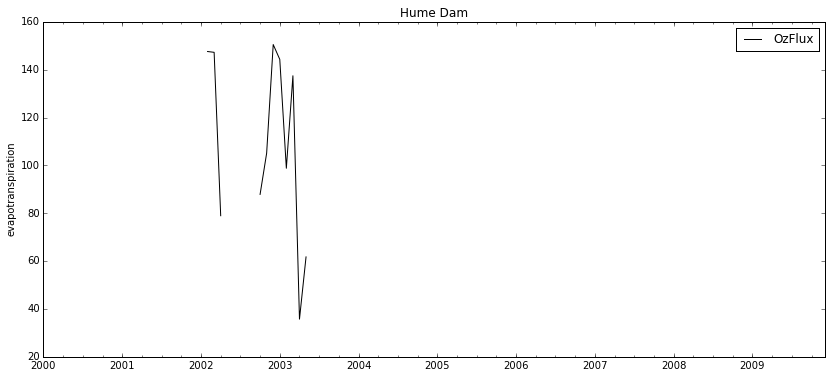

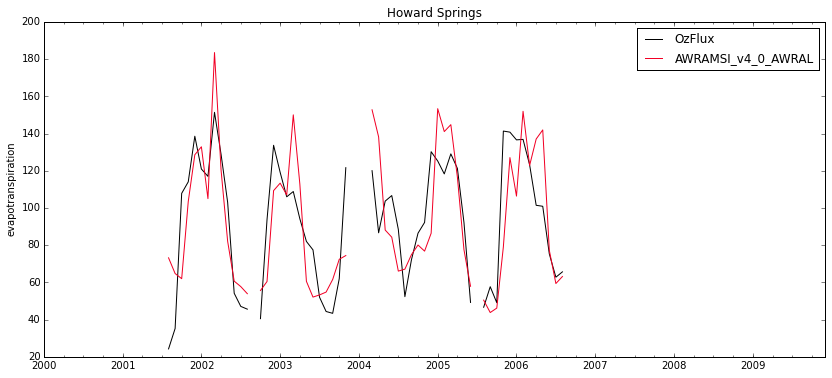

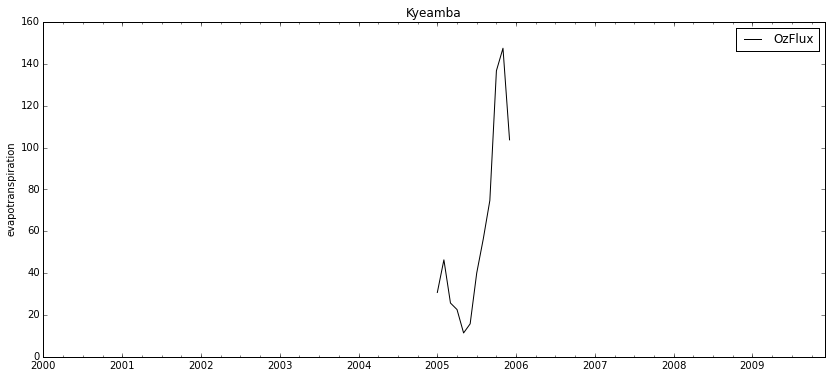

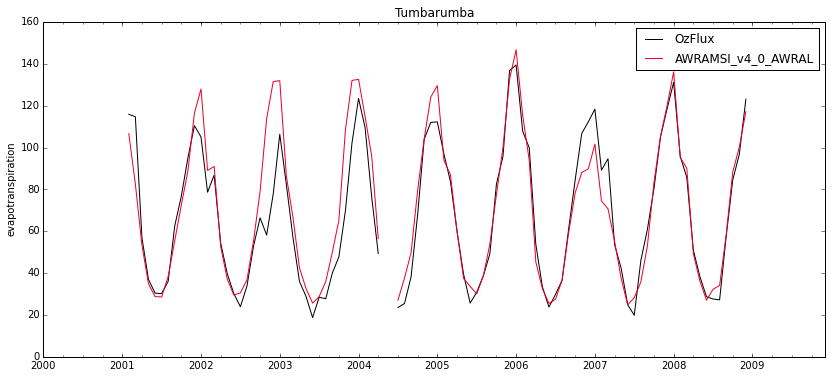

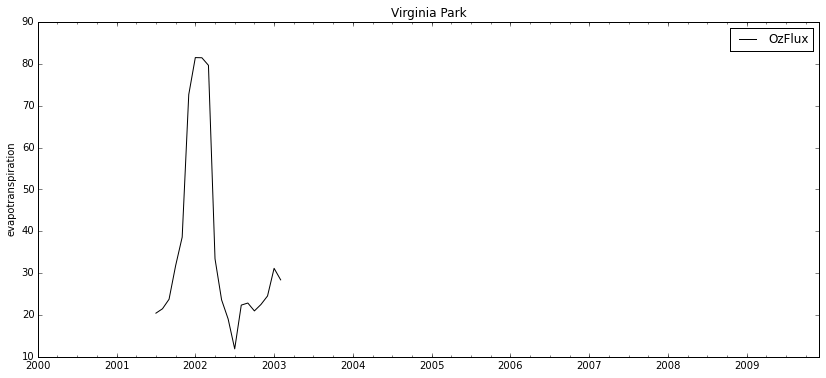

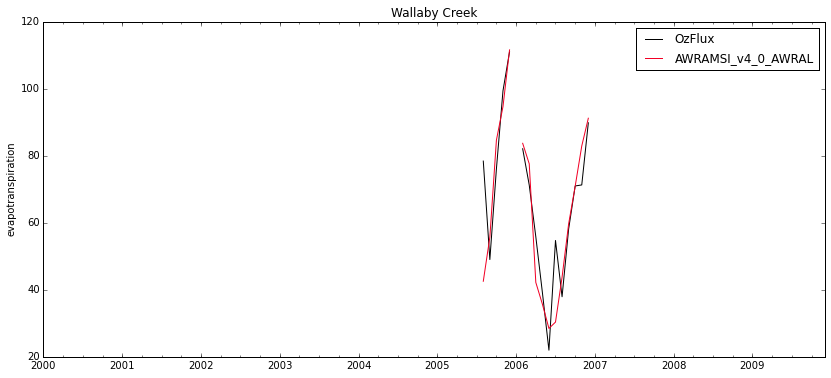

In [8]:
for site in et.sites:
    p = et.benchmark.plot_timeseries(site) #u'Tumbarumba')

## Regression plotting
specify frequency by "freq=d" for daily, "freq=m" for monthly, "freq=y" for yearly<br>
can customise titles, labels, scaling etc using standard matplotlib keyword arguments


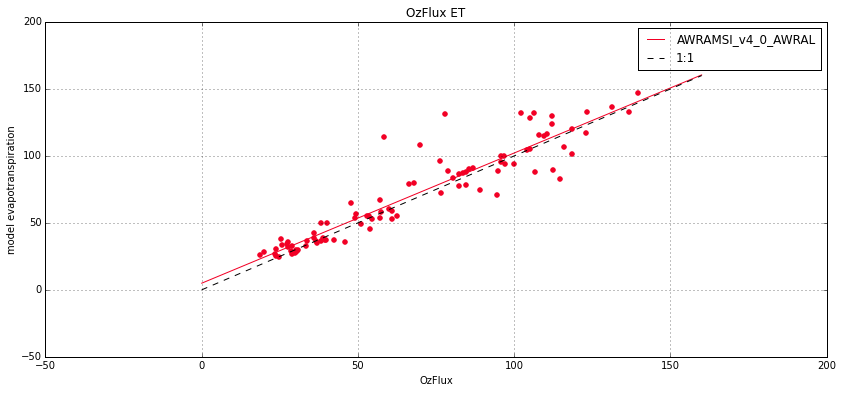

In [9]:
p = et.benchmark.plot_regression(title="OzFlux ET", site='Tumbarumba')

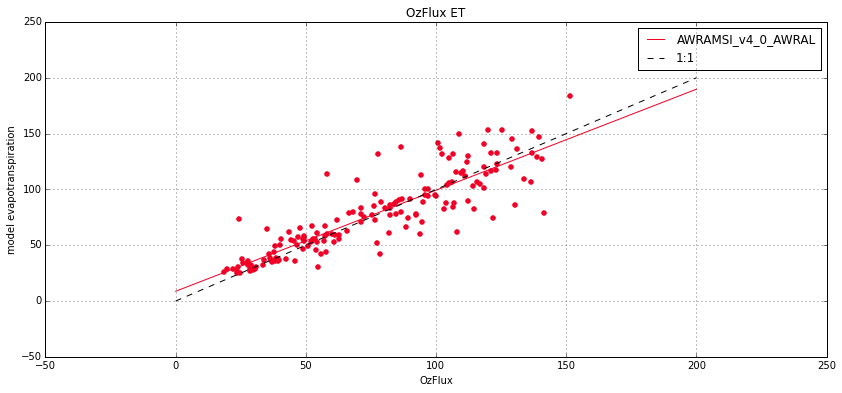

In [10]:
p = et.benchmark.plot_regression(title="OzFlux ET")

In [11]:
et.benchmark.stat(freq='m')

,AWRAMSI_v4_0_AWRAL,OzFlux
Wallaby Creek,64.764567,66.738713
Howard Springs,92.488276,92.506195
Tumbarumba,70.723843,67.648010
all,77.532691,75.996553


In [12]:
et.benchmark.stat(statistic='bias_relative', freq='m')

,AWRAMSI_v4_0_AWRAL
Wallaby Creek,-0.029580
Howard Springs,-0.000194
Tumbarumba,0.045468
all,0.020213


In [13]:
et.benchmark.stat(statistic='bias')

,AWRAMSI_v4_0_AWRAL
Wallaby Creek,-1.974145
Howard Springs,-0.017919
Tumbarumba,3.075834
all,1.536138


In [14]:
et.benchmark.stat(statistic='nse', freq='m')

,AWRAMSI_v4_0_AWRAL
Wallaby Creek,0.702345
Howard Springs,0.481839
Tumbarumba,0.846983
all,0.742059


In [15]:
et.benchmark.stat(statistic='pearsons_r', freq='m')

,AWRAMSI_v4_0_AWRAL
Wallaby Creek,0.871557
Howard Springs,0.753361
Tumbarumba,0.931595
all,0.876588


In [16]:
et.benchmark.stat(statistic='rmse', freq='m')

,AWRAMSI_v4_0_AWRAL
Wallaby Creek,12.451279
Howard Springs,24.355289
Tumbarumba,13.163603
all,17.720681


In [17]:
et.benchmark.stat(freq='y') # mean

,AWRAMSI_v4_0_AWRAL,OzFlux
Wallaby Creek,646.830940,653.633500
Howard Springs,949.458323,952.071240
Tumbarumba,822.164680,786.408113
all,855.102857,836.089614


In [18]:
et.benchmark.stat(statistic='bias_relative', freq='y')

,AWRAMSI_v4_0_AWRAL
Wallaby Creek,-0.010407
Howard Springs,-0.002744
Tumbarumba,0.045468
all,0.022741


In [19]:
et.benchmark.stat(statistic='bias', freq='y')

,AWRAMSI_v4_0_AWRAL
Wallaby Creek,-6.802560
Howard Springs,-2.612917
Tumbarumba,35.756568
all,19.013242


In [20]:
et.benchmark.stat(statistic='nse', freq='y')

,AWRAMSI_v4_0_AWRAL
Wallaby Creek,-inf
Howard Springs,0.886125
Tumbarumba,-0.383631
all,0.641647


In [21]:
et.benchmark.stat(statistic='pearsons_r', freq='y')

,AWRAMSI_v4_0_AWRAL
Wallaby Creek,NaN
Howard Springs,0.975266
Tumbarumba,0.177652
all,0.815405


In [22]:
et.benchmark.obs.annual['Wallaby Creek']

2000-12-31         NaN
2001-12-31         NaN
2002-12-31         NaN
2003-12-31         NaN
2004-12-31         NaN
2005-12-31    414.1859
2006-12-31    653.6335
2007-12-31         NaN
2008-12-31         NaN
2009-12-31         NaN
Freq: A-DEC, Name: Wallaby Creek, dtype: float64

In [23]:
et.benchmark.models.AWRAMSI_v4_0_AWRAL.data.annual['Wallaby Creek']

2006-12-31    646.83094
Freq: A-DEC, Name: Wallaby Creek, dtype: float64

In [24]:
et.benchmark.stat(statistic='rmse', freq='y')

,AWRAMSI_v4_0_AWRAL
Wallaby Creek,6.802560
Howard Springs,32.118603
Tumbarumba,95.562150
all,74.766921
